# EDA for test_data.xlsx

## Import libraries

In [40]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [41]:
# load data
df = pd.read_excel("../data/raw/test_data_original.xlsx")
df.head()

,Creation Date,Doc Date,Shop ID,Shop Name,Doc ID,Trans Type,Src Doc Date,Src Doc ID,VIP ID,skuId,...,Cat5 ID,Cat5 Name,Cat6 ID,Cat6 Name,Cat7 ID,Cat7 Name,PM ID,PM Name,ShopType ID,ShopType Name
0,2025-01-31 10:31:01,2025-01-31,ATTAM,Tampines Mall,80AT062501310001,Sales,NaN,NaN,NaN,ME2354-QU,...,QU,QUEEN,DOB,DOBBY,ONLI,Online,P01,Cash,AT,Atrium
1,2025-01-31 10:34:28,2025-01-31,ATTAM,Tampines Mall,80AT062501310002,Sales,NaN,NaN,NaN,EPN-ST-MP-KI,...,KI,KING,NaN,NaN,EPIN,Epinova,P02,Nets,AT,Atrium
2,2025-01-31 10:38:17,2025-01-31,EHTAM,Tampines mall,20EHTAM2501310001,Sales,NaN,NaN,NaN,HS1342-QBS,...,QU,QUEEN,PRI,PRINTED,ESSE,Essentials,P03,Visa,EH,Retail
3,2025-01-31 10:38:17,2025-01-31,EHTAM,Tampines mall,20EHTAM2501310001,Sales,NaN,NaN,NaN,EL1903-PC,...,STD,STANDARD,NaN,NaN,SIGN,Signature,P03,Visa,EH,Retail
4,2025-01-31 10:38:17,2025-01-31,EHTAM,Tampines mall,20EHTAM2501310001,Sales,NaN,NaN,NaN,EL1903-PC,...,STD,STANDARD,NaN,NaN,SIGN,Signature,P03,Visa,EH,Retail


In [42]:
df.columns.tolist()

['Creation Date',
 'Doc Date',
 'Shop ID',
 'Shop Name',
 'Doc ID',
 'Trans Type',
 'Src Doc Date',
 'Src Doc ID',
 'VIP ID',
 'skuId',
 'Name',
 'Stk Qty',
 'List Price',
 'Disc Char',
 'Net Price',
 'Line Tax',
 'Line Total Net',
 'Emp ID1',
 'Emp Name1',
 'Emp ID2',
 'Emp Name2',
 'MC ID',
 'MC Name',
 'Brand ID',
 'Brand Name',
 'Cat1 ID',
 'Cat1 Name',
 'Cat2 ID',
 'Cat2 Name',
 'Cat3 ID',
 'Cat3 Name',
 'Cat4 ID',
 'Cat4 Name',
 'Cat5 ID',
 'Cat5 Name',
 'Cat6 ID',
 'Cat6 Name',
 'Cat7 ID',
 'Cat7 Name',
 'PM ID',
 'PM Name',
 'ShopType ID',
 'ShopType Name']

In [11]:
df['Shop Name'].unique()
# print(f"Total number of outlets: {df['Shop Name'].nunique()}")

array(['Tampines Mall', 'Tampines mall', 'Hillion Mall', 'Hougang Mall',
       'Ang Mo Kio Hub', 'Oasis Terrace', 'Nex', 'Jurong Point',
       'EpitexHome Pasir Ris Mall(Outlet)', 'Lot 1', 'Plaza Singapura',
       'Causeway Point', 'City Square Mall', 'Sengkang Grand Mall',
       'Junction 8', 'Westgate', 'IMM', 'Parkway Parade', 'Sun Plaza',
       'Northpoint City', 'Waterway Point(Outlet)', 'Seletar Mall',
       'United Square', 'Singpost Centre',
       'SleepTec Pasir Ris Mall(Outlet)', 'Pasir Ris Mall', 'Lot One',
       'Tiong Bahru Plaza', 'East Point Mall', 'Waterway Point'],
      dtype=object)

In [12]:
df.shape

(74148, 43)

In [13]:
df.describe()

,Stk Qty,List Price,Net Price,Line Tax,Line Total Net
count,74148.000000,74148.000000,74148.000000,74148.000000,74148.000000
mean,0.776447,75.371636,44.770683,3.237997,35.976070
std,0.684574,101.140212,56.982652,5.102900,56.692708
min,-4.000000,0.000000,0.000000,-132.110000,-1467.890000
25%,1.000000,24.900000,10.000000,0.830000,9.170000
50%,1.000000,39.000000,24.900000,2.050000,22.840000
75%,1.000000,89.900000,59.000000,4.130000,45.790000
max,10.000000,3099.000000,3000.000000,247.700000,2752.300000


In [14]:
# create a group for each shop, multify by 'Line Total Net' and sum up, converts resulting series to a dataframe
sales_per_shop = df.groupby('Shop Name')['Line Total Net'].sum().reset_index()
sales_per_shop = sales_per_shop.rename(columns={'Line Total Net': 'Total Sales'})
print(sales_per_shop)

                            Shop Name  Total Sales
0                      Ang Mo Kio Hub    112880.51
1                      Causeway Point    159386.83
2                    City Square Mall     37447.68
3                     East Point Mall     14597.93
4   EpitexHome Pasir Ris Mall(Outlet)     60976.74
5                        Hillion Mall      3077.93
6                        Hougang Mall    101247.60
7                                 IMM    100846.65
8                          Junction 8    135336.40
9                        Jurong Point    251548.95
10                              Lot 1     91794.08
11                            Lot One     25171.49
12                                Nex    180373.05
13                    Northpoint City    168402.43
14                      Oasis Terrace     37856.17
15                     Parkway Parade     94321.77
16                     Pasir Ris Mall      3900.14
17                    Plaza Singapura     71724.73
18                       Seleta

In [15]:
# Filter for Atrium shops and current month
df['Doc Date'] = pd.to_datetime(df['Doc Date'])
current_month = df['Doc Date'].dt.to_period('M').max()
atrium_sales = df[
    (df['ShopType Name'] == 'Atrium') &
    (df['Doc Date'].dt.to_period('M') == current_month)
]['Line Total Net'].sum()
print(f"Atrium sales for {current_month}: {atrium_sales:.2f}")

Atrium sales for 2025-01: 657826.00


## Datasets with Changes in Column names

In [16]:
df = df.rename(columns={'Shop Name': 'outlet_name', 'Line Total Net': 'net_sales_per_line'})
df.to_csv("../data/processed/test_data.csv", index=False)

In [17]:
total_atrium_sales = df[df['ShopType Name'] == 'Atrium']['net_sales_per_line'].sum()
print(f"Total Atrium sales: {total_atrium_sales:.2f}")

Total Atrium sales: 657826.00


In [18]:
atrium_sales_per_outlet = df[df['ShopType Name'] == 'Atrium'].groupby('outlet_name')['net_sales_per_line'].sum().reset_index()
atrium_sales_per_outlet = atrium_sales_per_outlet.rename(columns={'net_sales_per_line': 'atrium_sales'})
print(atrium_sales_per_outlet)

          outlet_name  atrium_sales
0      Causeway Point      38428.07
1     East Point Mall      14597.93
2        Hillion Mall       3077.93
3        Hougang Mall      48678.92
4                 IMM      41198.20
5          Junction 8      63167.58
6        Jurong Point      13262.59
7             Lot One      25171.49
8     Northpoint City      30115.58
9      Parkway Parade      23774.34
10     Pasir Ris Mall       3900.14
11       Seletar Mall      15080.16
12          Sun Plaza      13008.87
13      Tampines Mall     135154.58
14  Tiong Bahru Plaza      16270.30
15      United Square       8682.86
16     Waterway Point      43821.71
17           Westgate     120434.75


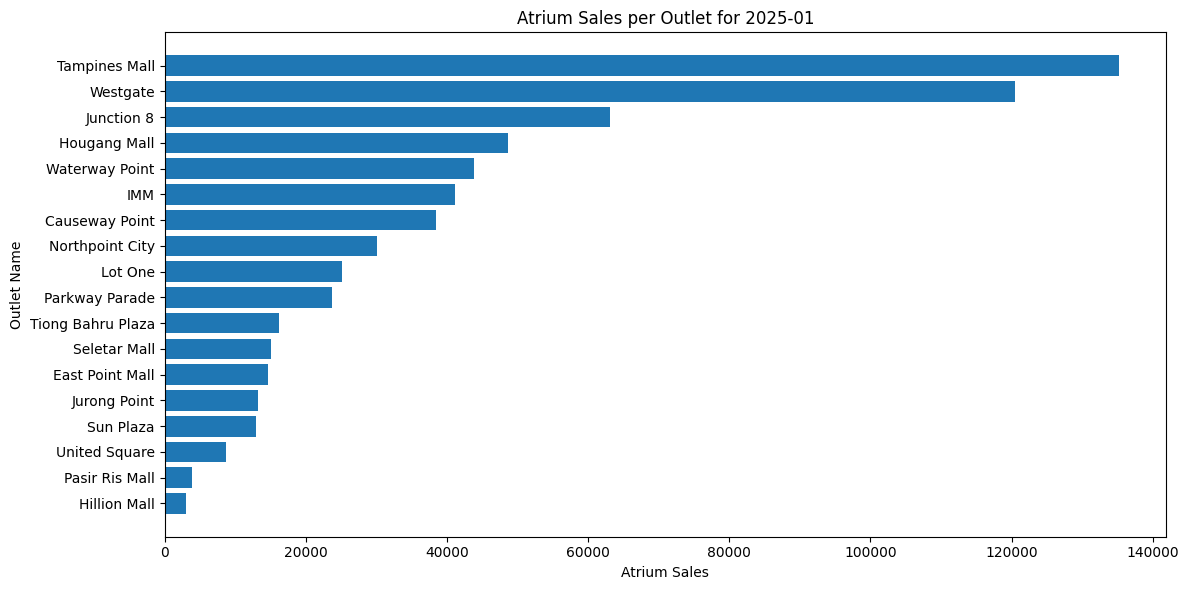

In [22]:
atrium_sales_per_outlet_sorted = atrium_sales_per_outlet.sort_values(by='atrium_sales', ascending=True)
plt.figure(figsize=(12, 6))
plt.barh(atrium_sales_per_outlet_sorted['outlet_name'], atrium_sales_per_outlet_sorted['atrium_sales'])
plt.xlabel('Atrium Sales')
plt.ylabel('Outlet Name')
plt.title(f'Atrium Sales per Outlet for {current_month}')
plt.tight_layout()
plt.show()


### Checking if there is Consignment related informaton

In [23]:
trans_type_percent = df['Trans Type'].value_counts(normalize=True) * 100
print(trans_type_percent)

Sales      99.204294
Return      0.793009
Deposit     0.002697
Name: Trans Type, dtype: float64


In [24]:
# Ensure 'Doc Date' is datetime
df['Doc Date'] = pd.to_datetime(df['Doc Date'])

# Extract month for grouping
df['Month'] = df['Doc Date'].dt.to_period('M')

# Filter for consignment sales (adjust 'Consignment' to match your actual value)
consignment_df = df[df['Trans Type'] == 'Consignment']

# Group by month and consignee, sum sales
consignment_sales = consignment_df.groupby(['Month', 'outlet_name'])['net_sales_per_line'].sum().reset_index()
consignment_sales = consignment_sales.rename(columns={'net_sales_per_line': 'consignment_sales'})
print(consignment_sales)

Empty DataFrame
Columns: [Month, outlet_name, consignment_sales]
Index: []


### Outlets sales trend

In [48]:
df_name_change = pd.read_csv("../data/processed/test_data.csv")
df_name_change.head()

,Creation Date,Doc Date,Shop ID,outlet_name,Doc ID,Trans Type,Src Doc Date,Src Doc ID,VIP ID,skuId,...,Cat5 ID,Cat5 Name,Cat6 ID,Cat6 Name,Cat7 ID,Cat7 Name,PM ID,PM Name,ShopType ID,ShopType Name
0,2025-01-31 10:31:01,2025-01-31,ATTAM,Tampines Mall,80AT062501310001,Sales,NaN,NaN,NaN,ME2354-QU,...,QU,QUEEN,DOB,DOBBY,ONLI,Online,P01,Cash,AT,Atrium
1,2025-01-31 10:34:28,2025-01-31,ATTAM,Tampines Mall,80AT062501310002,Sales,NaN,NaN,NaN,EPN-ST-MP-KI,...,KI,KING,NaN,NaN,EPIN,Epinova,P02,Nets,AT,Atrium
2,2025-01-31 10:38:17,2025-01-31,EHTAM,Tampines mall,20EHTAM2501310001,Sales,NaN,NaN,NaN,HS1342-QBS,...,QU,QUEEN,PRI,PRINTED,ESSE,Essentials,P03,Visa,EH,Retail
3,2025-01-31 10:38:17,2025-01-31,EHTAM,Tampines mall,20EHTAM2501310001,Sales,NaN,NaN,NaN,EL1903-PC,...,STD,STANDARD,NaN,NaN,SIGN,Signature,P03,Visa,EH,Retail
4,2025-01-31 10:38:17,2025-01-31,EHTAM,Tampines mall,20EHTAM2501310001,Sales,NaN,NaN,NaN,EL1903-PC,...,STD,STANDARD,NaN,NaN,SIGN,Signature,P03,Visa,EH,Retail


In [50]:
df_name_change['outlet_name'] = df_name_change['outlet_name'].str.lower().str.replace(' ', '_')


In [51]:
unique_outlets = df_name_change['outlet_name'].unique()
print(f"Unique outlets: {unique_outlets}")

Unique outlets: ['tampines_mall' 'hillion_mall' 'hougang_mall' 'ang_mo_kio_hub'
 'oasis_terrace' 'nex' 'jurong_point' 'epitexhome_pasir_ris_mall(outlet)'
 'lot_1' 'plaza_singapura' 'causeway_point' 'city_square_mall'
 'sengkang_grand_mall' 'junction_8' 'westgate' 'imm' 'parkway_parade'
 'sun_plaza' 'northpoint_city' 'waterway_point(outlet)' 'seletar_mall'
 'united_square' 'singpost_centre' 'sleeptec_pasir_ris_mall(outlet)'
 'pasir_ris_mall' 'lot_one' 'tiong_bahru_plaza' 'east_point_mall'
 'waterway_point']


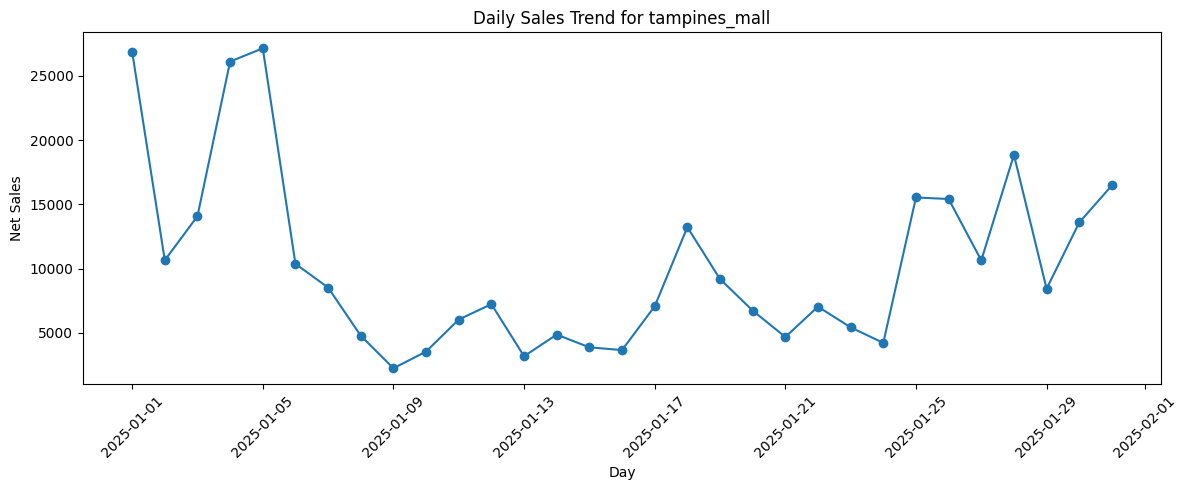

In [61]:
# Group by outlet and day, sum sales
df_name_change['Day'] = pd.to_datetime(df_name_change['Doc Date']).dt.date
outlet_daily_sales = df_name_change.groupby(['outlet_name', 'Day'])['net_sales_per_line'].sum().reset_index()

# Example: plot daily sales trend for a specific outlet
outlet = 'tampines_mall'
outlet_data_daily = outlet_daily_sales[outlet_daily_sales['outlet_name'] == outlet]
plt.figure(figsize=(12, 5))
plt.plot(outlet_data_daily['Day'], outlet_data_daily['net_sales_per_line'], marker='o')
plt.title(f'Daily Sales Trend for {outlet}')
plt.xlabel('Day')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
outlet_daily_sales[outlet_daily_sales['outlet_name'].isin(['Tampines Mall', 'Tampines mall'])]

,outlet_name,Day,net_sales_per_line
570,Tampines Mall,2025-01-01,18158.03
571,Tampines Mall,2025-01-02,7720.96
572,Tampines Mall,2025-01-03,11406.64
573,Tampines Mall,2025-01-04,19259.37
574,Tampines Mall,2025-01-05,18799.94
575,Tampines Mall,2025-01-06,6437.95
576,Tampines Mall,2025-01-07,6435.55
577,Tampines Mall,2025-01-28,12362.54
578,Tampines Mall,2025-01-29,8437.19
579,Tampines Mall,2025-01-30,13587.60
